In [1]:
import ember
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import numpy as np
from tqdm import tqdm
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

emberData = "C:\\Users\\cosbyd\\OneDrive - purdue.edu\\Documents\\ember2018"

In [2]:
#create the train/test split (change PATH to where teh ember2018 file is stored tho)
#returns 4 np array (x/y  train and x/y test)
X_train, y_train, X_test, y_test = ember.read_vectorized_features(emberData)

In [3]:
#filter out any data that has a label of -1. These are the files that aren't classified where 0/1 is using to say if its either benign or malware
train_rows = (y_train != -1)
X = X_train[train_rows]
Y = y_train[train_rows]

#Normalize data between 0-1 for better output
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.fit_transform(X_test)

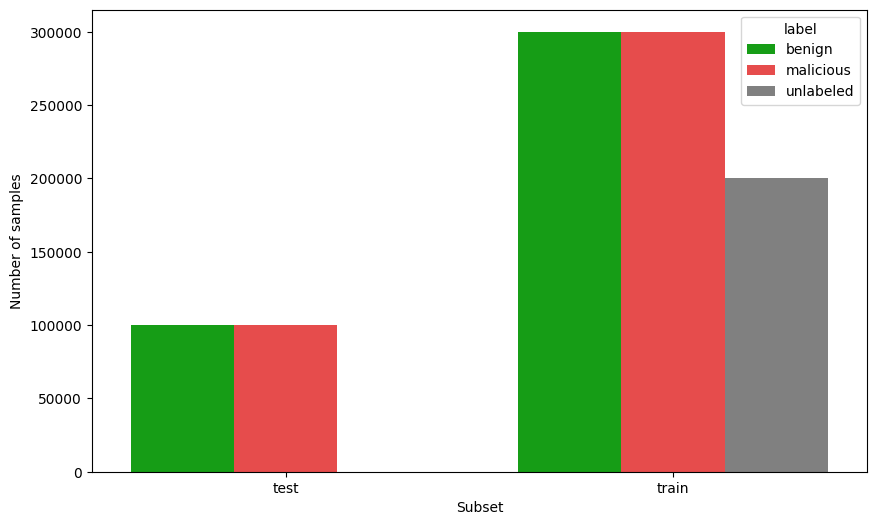

In [4]:
emberdf = ember.read_metadata(emberData)
plotdf = emberdf.copy()
plotdf['label'] = plotdf['label'].map({-1: 'unlabeled', 0: 'benign', 1: 'malicious'})
gbdf = plotdf.groupby(["label", "subset"]).count().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='subset', y='sha256', hue='label', data=gbdf, palette=["#00b300", "#ff3333", "#808080"])
plt.xlabel('Subset')
plt.ylabel('Number of samples')
plt.show()

In [5]:
#define model architecture 
model = models.Sequential()
model.add(layers.Dense(2400, activation='relu', input_dim=2381))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1200, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1200, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

#compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2400)              5716800   
                                                                 
 dropout (Dropout)           (None, 2400)              0         
                                                                 
 dense_1 (Dense)             (None, 1200)              2881200   
                                                                 
 dropout_1 (Dropout)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 1200)              1441200   
                                                                 
 dense_3 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 10,040,401
Trainable params: 10,040,401
No

In [6]:
#train model for 20 epochs
model.fit(x=X_scaled, y=Y, batch_size=128, epochs=10, verbose=1, shuffle=True, validation_split = 0.01) 
(print)

Epoch 1/10
4641/4641 [==============================] - 462s 99ms/step - loss: 0.1972 - accuracy: 0.9205 - val_loss: 0.1347 - val_accuracy: 0.9422
Epoch 2/10
4641/4641 [==============================] - 450s 97ms/step - loss: 0.1462 - accuracy: 0.9424 - val_loss: 0.1047 - val_accuracy: 0.9538
Epoch 3/10
4641/4641 [==============================] - 449s 97ms/step - loss: 0.1248 - accuracy: 0.9507 - val_loss: 0.1054 - val_accuracy: 0.9630
Epoch 4/10
4641/4641 [==============================] - 451s 97ms/step - loss: 0.1128 - accuracy: 0.9552 - val_loss: 0.0915 - val_accuracy: 0.9703
Epoch 5/10
4641/4641 [==============================] - 450s 97ms/step - loss: 0.1047 - accuracy: 0.9584 - val_loss: 0.0885 - val_accuracy: 0.9697
Epoch 6/10
4641/4641 [==============================] - 450s 97ms/step - loss: 0.1000 - accuracy: 0.9609 - val_loss: 0.0970 - val_accuracy: 0.9682
Epoch 7/10
4641/4641 [==============================] - 454s 98ms/step - loss: 0.0971 - accuracy: 0.9626 - val_loss: 0

In [7]:
#evaluation the performance
evaluation = model.evaluate(x=X_test_scaled, y=y_test, batch_size=32, verbose=1)
print('Test loss:', evaluation[0])
print('Test accuracy:', evaluation[1])

6250/6250 [==============================] - 46s 7ms/step - loss: 0.3738 - accuracy: 0.9184
Test loss: 0.37377116084098816
Test accuracy: 0.9183949828147888


In [8]:
model.save('trainedModel.h5')